# Assessment for CASA0002 – Urban Simulation

## Part 1: London’s underground resilience

### I. Topological network

#### I.1. Centrality measures:

In [1]:
# Import the necessary packages
import pandas as pd
import networkx as nx
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
# load the graph data
file_network = nx.read_graphml("data/london.graphml")

### (1) Degree Centrality

**Definition:** Degree centrality is a measure of the number of direct connections a node (or in this case, a station) has. In other words, it gives you an idea of how many lines directly come in and out of a station. For undirected networks, it's simply the number of links attached to a node.

**Equation:** 
$$ C_D(v) = \frac{d_v}{n-1} $$
Where:
- $C_D(v)$ is the degree centrality of node $v$.
- $d_v$ is the degree of node $v$ (number of direct connections).
- $n$ is the total number of nodes in the network.

In [3]:
import networkx as nx
import pandas as pd

# Calculate the degree centrality of the London network
# Initialize the degree measures using networkx's degree function
network_degrees = nx.degree(file_network)

# Convert the result into a DataFrame for easier manipulation
degree_dataframe = pd.DataFrame(network_degrees, columns=['NodeName', 'DegreeValue'])

# Sort the DataFrame based on degree values in descending order to get top nodes
degree_dataframe_sorted = degree_dataframe.sort_values(by='DegreeValue', ascending=False)

# Display the top 10 nodes based on degree centrality
degree_dataframe_sorted.head(10)

,NodeName,DegreeValue
5,Stratford,9
50,Bank and Monument,8
229,King's Cross St. Pancras,7
18,Baker Street,7
180,Earl's Court,6
45,Oxford Circus,6
51,Liverpool Street,6
14,Waterloo,6
16,Green Park,6
7,Canning Town,6


## (2) Closeness Centrality

**Definition:** Closeness centrality measures the reciprocal of the mean geodesic distance (shortest path) from a given node to all other nodes in the network. A node that is closer to most other nodes and has a low mean geodesic distance is deemed to be more central, indicating that it can reach other nodes more quickly than those with higher mean geodesic distances.

**Equation:** Let $d_{ij}$ be the geodesic distance between node \(i\) and node \(j\). The mean geodesic distance of node \(i\) to all other nodes is represented as:

\begin{equation}
l_{i} = \frac{1}{n} \sum_{j} d_{ij}
\end{equation}

where \(n\) is the total number of nodes in the network. 

The closeness centrality $C_i$ for node \(i\) is then given by the reciprocal of this mean geodesic distance:

\begin{equation}
C_{i} = \frac{n}{\sum_{j} d_{ij}}
\end{equation}


In [4]:
# Calculate the closeness centrality of the London network considering distances
# Get the closeness values for each node in the network
network_closeness = nx.closeness_centrality(file_network, distance='distance')

# Convert the dictionary of closeness values into a DataFrame
closeness_dataframe = pd.DataFrame.from_dict(network_closeness, orient='index', columns=['ClosenessValue']).reset_index()

# Rename the columns for better readability
closeness_dataframe.columns = ['NodeName', 'ClosenessValue']

# Sort based on closeness values in descending order to get the top nodes
closeness_dataframe_sorted = closeness_dataframe.sort_values(by='ClosenessValue', ascending=False)

# Display the top 10 nodes based on closeness centrality
closeness_dataframe_sorted.head(10)

,NodeName,ClosenessValue
16,Green Park,0.114778
50,Bank and Monument,0.113572
229,King's Cross St. Pancras,0.113443
15,Westminster,0.112549
14,Waterloo,0.112265
45,Oxford Circus,0.111204
17,Bond Street,0.110988
230,Farringdon,0.110742
312,Angel,0.110742
232,Moorgate,0.110314


## (3) Betweenness Centrality

**Definition:** Betweenness centrality quantifies the significance of a node based on how often it serves as a bridge or intermediary along the shortest paths between other nodes in the network. This measure underscores nodes that, although they might not be highly connected themselves, play a crucial role in controlling the flow of information through the network.

Given a pair of nodes \(s\) and \(t\), let's introduce a variable \(n^i_{st}\):

\begin{equation}
n^{i}_{st} = 
\begin{cases} 
1 & \text{if node \(i\) is part of the shortest (geodesic) path connecting \(s\) and \(t\)} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

The basic premise for betweenness centrality of node \(i\) is the summation across all pairs of nodes \(s\) and \(t\) of \(n^i_{st}\):

\begin{equation}
B_i = \sum_{s,t} n^{i}_{st}
\end{equation}

However, it's possible for multiple shortest paths to exist between a pair \(s\) and \(t\). To consider this multiplicity, we introduce \(g_{st}\) as the number of geodesic paths from \(s\) to \(t\). The normalized betweenness centrality becomes:

\begin{equation}
B_i = \sum_{s,t} \frac{n^{i}_{st}}{g_{st}}
\end{equation}

This representation of betweenness centrality emphasizes the node's role as a conduit or pass-through in the network's communication patterns.


In [5]:
# Calculate the betweenness centrality of the London network considering distances
# Get the betweenness centrality values for each node
network_betweenness = nx.betweenness_centrality(file_network, weight='distance')

# Convert the betweenness dictionary into a DataFrame
betweenness_dataframe = pd.DataFrame.from_dict(network_betweenness, orient='index', columns=['BetweennessValue']).reset_index()

# Rename the columns for clarity
betweenness_dataframe.columns = ['NodeName', 'BetweennessValue']

# Sort the DataFrame based on betweenness values to get the top nodes
betweenness_dataframe_sorted = betweenness_dataframe.sort_values(by='BetweennessValue', ascending=False)

# Display the top 10 nodes based on betweenness centrality
betweenness_dataframe_sorted.head(10)

,NodeName,BetweennessValue
5,Stratford,0.297846
50,Bank and Monument,0.290489
51,Liverpool Street,0.270807
229,King's Cross St. Pancras,0.255307
14,Waterloo,0.243921
16,Green Park,0.215835
150,Euston,0.208324
15,Westminster,0.203335
18,Baker Street,0.191568
21,Finchley Road,0.165085


#### I.2. Impact measures:

## Impact Measures: Evaluating Network Resilience

### 1. Average Degree

**Definition:** The average degree of a network is the mean value of the degrees of all nodes in the network. In mathematical terms, if \(D\) is the degree of each node, then:

\begin{equation}
\text{Average Degree} = \frac{\sum_{i} D_i}{n}
\end{equation}

Where \(n\) is the total number of nodes in the network.

**Relevance to London Underground:** In the context of the London Underground, the average degree would represent the average number of direct connections each station has. A high average degree indicates that stations, on average, have many direct connections, which might suggest a resilient and interconnected system.

**General Applicability:** The average degree is not specific to the London Underground. It's a basic property of any network, from social networks to power grids. In any context, a higher average degree typically signifies a more interconnected network, which can often indicate higher resilience as there are more alternative paths.

### 2. Global Efficiency

**Definition:** Global efficiency is a measure that quantifies the efficiency of information or traffic exchange over a network. It's the average of the inverse shortest path length between every pair of nodes. Mathematically:

\begin{equation}
\text{Global Efficiency} = \frac{1}{n(n-1)} \sum_{i \neq j} \frac{1}{d_{ij}}
\end{equation}

Where \(d_{ij}\) is the shortest path distance between nodes \(i\) and \(j\), and \(n\) is the total number of nodes.

**Relevance to London Underground:** For the London Underground, global efficiency would provide an understanding of how efficiently passengers can travel between stations on average. A higher global efficiency would mean passengers can travel between any two stations with fewer transfers or stops, implying a more efficient and possibly more resilient system.

**General Applicability:** Global efficiency can be applied to any network, not just the London Underground. It provides insights into how efficiently information or goods (or any relevant entity) can traverse the network. For instance, in social networks, a higher global efficiency might suggest that information can spread more rapidly among individuals.

In conclusion, while both measures provide valuable insights into the London Underground's resilience, they are general measures and can be applied to evaluate the resilience of any network.


#### I.3. Node removal:

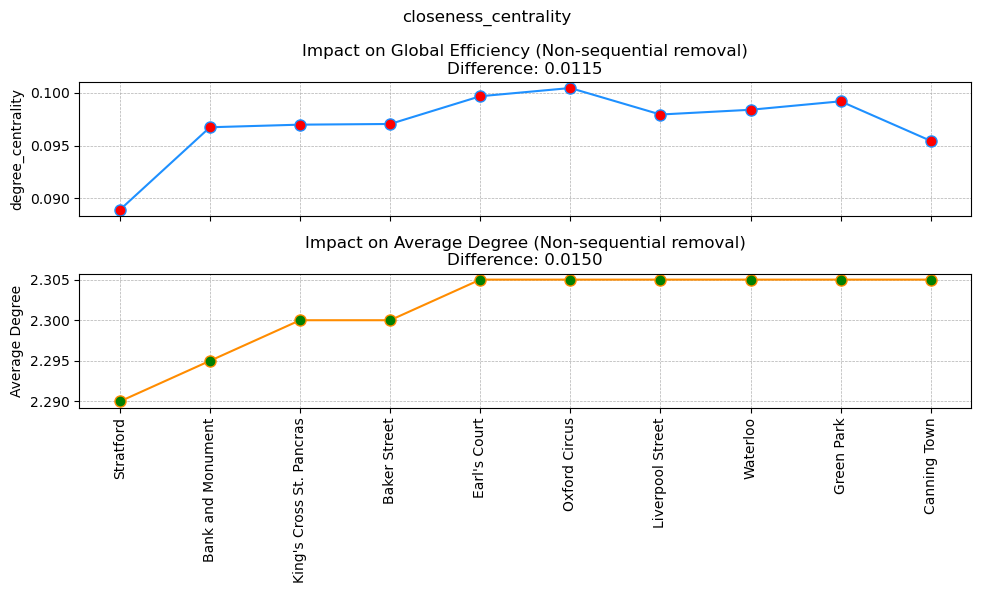

Degree Centrality:
[0.08891736066510689, 0.09673475608480861, 0.09698092211412515, 0.09704487984670325, 0.09967013965512744, 0.10044780407646106, 0.09794046203225844, 0.0983898922965154, 0.09918991960788402, 0.09544761951591814]
[2.29, 2.295, 2.3, 2.3, 2.305, 2.305, 2.305, 2.305, 2.305, 2.305]


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from statistics import mean

def evaluate_impact(network, nodes_to_remove):
    """Evaluate the impact of removing nodes on the global efficiency and average degree."""
    glob_eff_list = []
    avg_deg_list = []

    for node in nodes_to_remove:
        working_net = network.copy()
        working_net.remove_node(node)
        
        # Calculate global efficiency and average degree
        glob_eff_list.append(nx.global_efficiency(working_net))
        avg_deg_list.append(mean(dict(working_net.degree()).values()))

    return glob_eff_list, avg_deg_list

# Extract top 10 nodes based on degree centrality
top_10_nodes = list(degree_dataframe_sorted.NodeName[:10])

# Evaluate impacts
global_efficiencies, avg_degrees = evaluate_impact(file_network, top_10_nodes)

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('closeness_centrality')
# Global Efficiency Plot
ax1.plot(top_10_nodes, global_efficiencies, '-o', color="dodgerblue", markerfacecolor="red", markersize=8)
ax1.set_ylabel('global_efficiencies')
ax1.set_title(f'Impact on Global Efficiency (Non-sequential removal)\nDifference: {max(global_efficiencies) - min(global_efficiencies):.4f}')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Average Degree Plot
ax2.plot(top_10_nodes, avg_degrees, '-o', color="darkorange", markerfacecolor="green", markersize=8)
ax2.set_ylabel('Average Degree')
ax2.set_title(f'Impact on Average Degree (Non-sequential removal)\nDifference: {max(avg_degrees) - min(avg_degrees):.4f}')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_xticks(top_10_nodes)
ax2.set_xticklabels(top_10_nodes, rotation=90)

# Tight layout to prevent overlap
plt.tight_layout()
plt.show()

print(f'Degree Centrality:')
print(global_efficiencies)
print(avg_degrees)

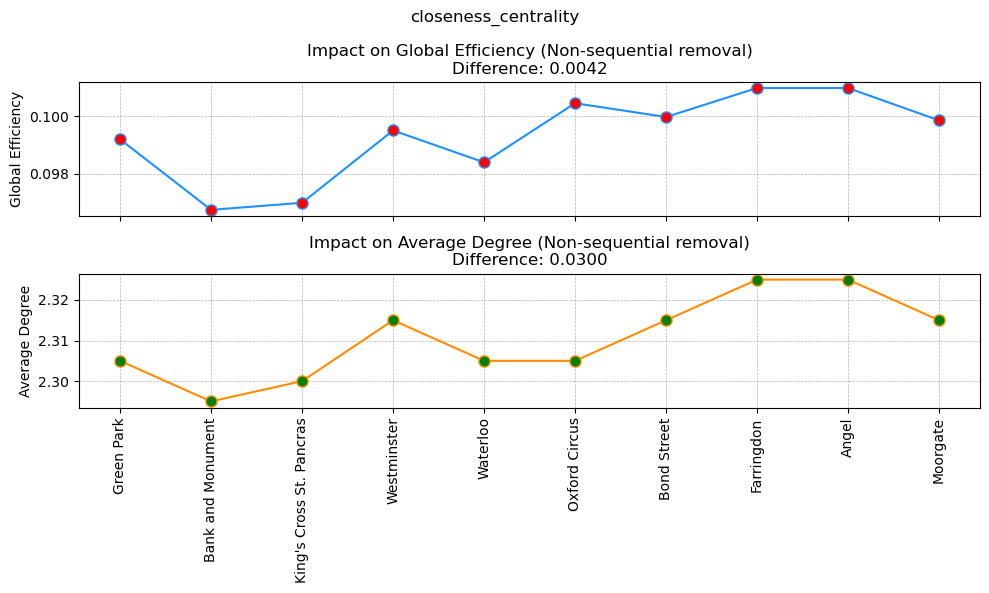

closeness_centrality:
[0.09918991960788402, 0.09673475608480861, 0.09698092211412515, 0.09949907471754985, 0.0983898922965154, 0.10044780407646106, 0.09996825535543873, 0.10097670318452971, 0.10097670318452971, 0.09984927529989257]
[2.305, 2.295, 2.3, 2.315, 2.305, 2.305, 2.315, 2.325, 2.325, 2.315]


In [11]:
# Extract top 10 nodes based on closeness centrality
top_10_closeness = list(closeness_dataframe_sorted.NodeName[:10])

# Evaluate impacts
global_efficiencies, avg_degrees = evaluate_impact(file_network, top_10_closeness)

# Construct dataframes
glob_eff_df = pd.DataFrame({
    'Removed_node': top_10_closeness,
    'Glob_Eff': global_efficiencies
})
avg_deg_df = pd.DataFrame({
    'Removed_node': top_10_closeness,
    'Average': avg_degrees
})

# Merging dataframes
merged_df = pd.merge(glob_eff_df, avg_deg_df, on='Removed_node')

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('closeness_centrality')
# Global Efficiency Plot
ax1.plot(merged_df.Removed_node, merged_df.Glob_Eff, '-o', color="dodgerblue", markerfacecolor="red", markersize=8)
ax1.set_ylabel('Global Efficiency')
ax1.set_title(f'Impact on Global Efficiency (Non-sequential removal)\nDifference: {merged_df.Glob_Eff.max() - merged_df.Glob_Eff.min():.4f}')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Average Degree Plot
ax2.plot(merged_df.Removed_node, merged_df.Average, '-o', color="darkorange", markerfacecolor="green", markersize=8)
ax2.set_ylabel('Average Degree')
ax2.set_title(f'Impact on Average Degree (Non-sequential removal)\nDifference: {merged_df.Average.max() - merged_df.Average.min():.4f}')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_xticks(merged_df.Removed_node)
ax2.set_xticklabels(merged_df.Removed_node, rotation=90)

# Tight layout to prevent overlap
plt.tight_layout()
plt.show()

print(f'closeness_centrality:')
print(list(merged_df.Glob_Eff))
print(list(merged_df.Average))

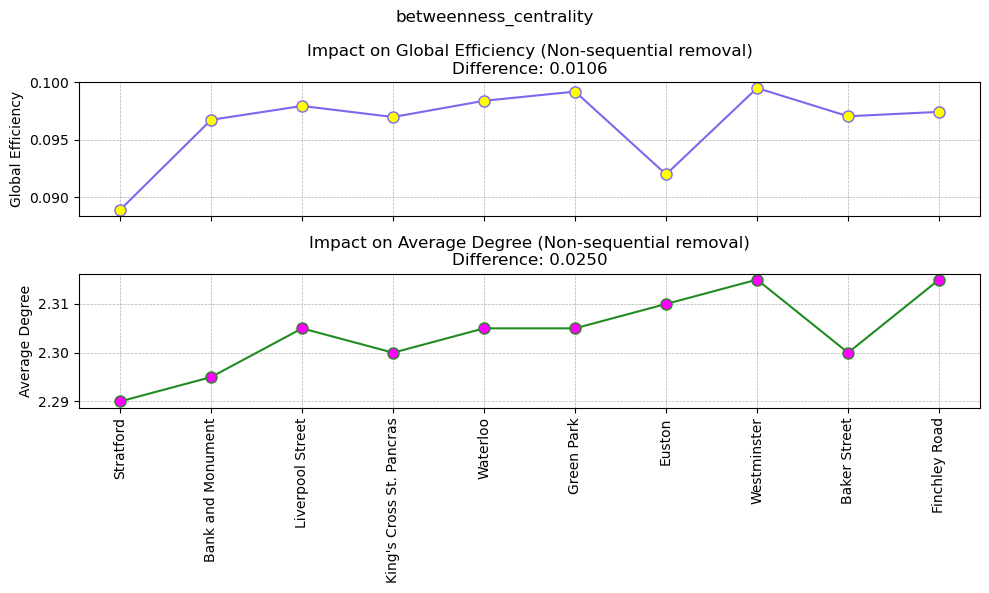

betweenness_centrality:
[0.08891736066510689, 0.09673475608480861, 0.09794046203225844, 0.09698092211412515, 0.0983898922965154, 0.09918991960788402, 0.09200018498202017, 0.09949907471754985, 0.09704487984670325, 0.09742956481452315]
[2.29, 2.295, 2.305, 2.3, 2.305, 2.305, 2.31, 2.315, 2.3, 2.315]


In [12]:
# Extract top 10 nodes based on betweenness centrality
top_10_betweenness = list(betweenness_dataframe_sorted.NodeName[:10])

# Evaluate impacts
global_efficiencies, avg_degrees = evaluate_impact(file_network, top_10_betweenness)

# Construct dataframes
glob_eff_df = pd.DataFrame({
    'Removed_node': top_10_betweenness,
    'Glob_Eff': global_efficiencies
})
avg_deg_df = pd.DataFrame({
    'Removed_node': top_10_betweenness,
    'Average': avg_degrees
})

# Merging dataframes
merged_df = pd.merge(glob_eff_df, avg_deg_df, on='Removed_node')

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('betweenness_centrality')
# Global Efficiency Plot
ax1.plot(merged_df.Removed_node, merged_df.Glob_Eff, '-o', color="mediumslateblue", markerfacecolor="yellow", markersize=8)
ax1.set_ylabel('Global Efficiency')
ax1.set_title(f'Impact on Global Efficiency (Non-sequential removal)\nDifference: {merged_df.Glob_Eff.max() - merged_df.Glob_Eff.min():.4f}')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Average Degree Plot
ax2.plot(merged_df.Removed_node, merged_df.Average, '-o', color="forestgreen", markerfacecolor="magenta", markersize=8)
ax2.set_ylabel('Average Degree')
ax2.set_title(f'Impact on Average Degree (Non-sequential removal)\nDifference: {merged_df.Average.max() - merged_df.Average.min():.4f}')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_xticks(merged_df.Removed_node)
ax2.set_xticklabels(merged_df.Removed_node, rotation=90)

# Tight layout to prevent overlap
plt.tight_layout()
plt.show()

print(f'betweenness_centrality:')
print(list(merged_df.Glob_Eff))
print(list(merged_df.Average))

Degree Centrality:
[0.08891736066510689, 0.08586164448742485, 0.08203328759057034, 0.07570039409751211, 0.07039592695635104, 0.06940235301523284, 0.0677717604548151, 0.06593580277595987, 0.06506900122239155, 0.056747518813518014]
[2.29, 2.255639097744361, 2.2261306532663316, 2.1964735516372795, 2.1717171717171717, 2.1468354430379746, 2.1218274111675126, 2.1017811704834606, 2.0816326530612246, 2.061381074168798]


C:\Users\12618\AppData\Local\Temp\ipykernel_15472\194311038.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(merged_df.Removed_node, rotation=90)


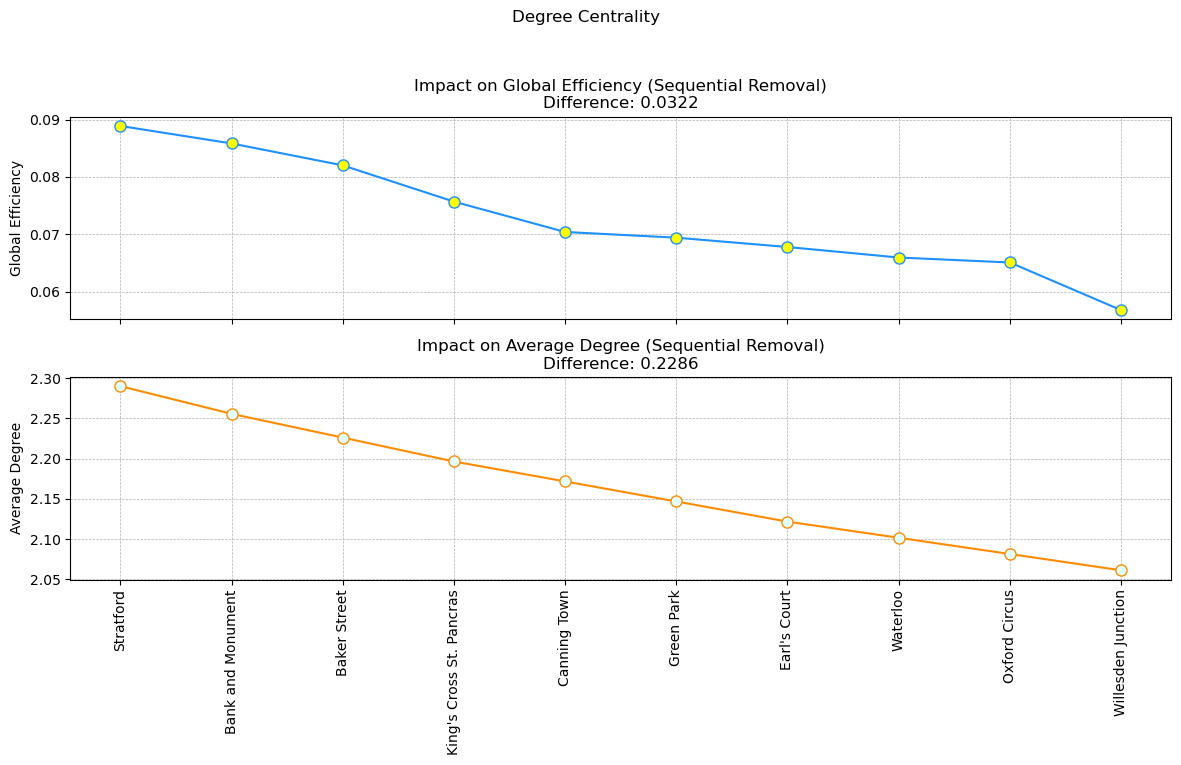

Closeness Centrality:
[0.09918991960788402, 0.09443475025566316, 0.09181648060183005, 0.08542563066911478, 0.08054424756502003, 0.05810104159173278, 0.051883620553389555, 0.05035000093626794, 0.04439458727102797, 0.04295771061337044]
[2.305, 2.275689223057644, 2.251256281407035, 2.2216624685138537, 2.207070707070707, 2.1924050632911394, 2.1522842639593907, 2.127226463104326, 2.1122448979591835, 2.0920716112531967]


C:\Users\12618\AppData\Local\Temp\ipykernel_15472\194311038.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(merged_df.Removed_node, rotation=90)


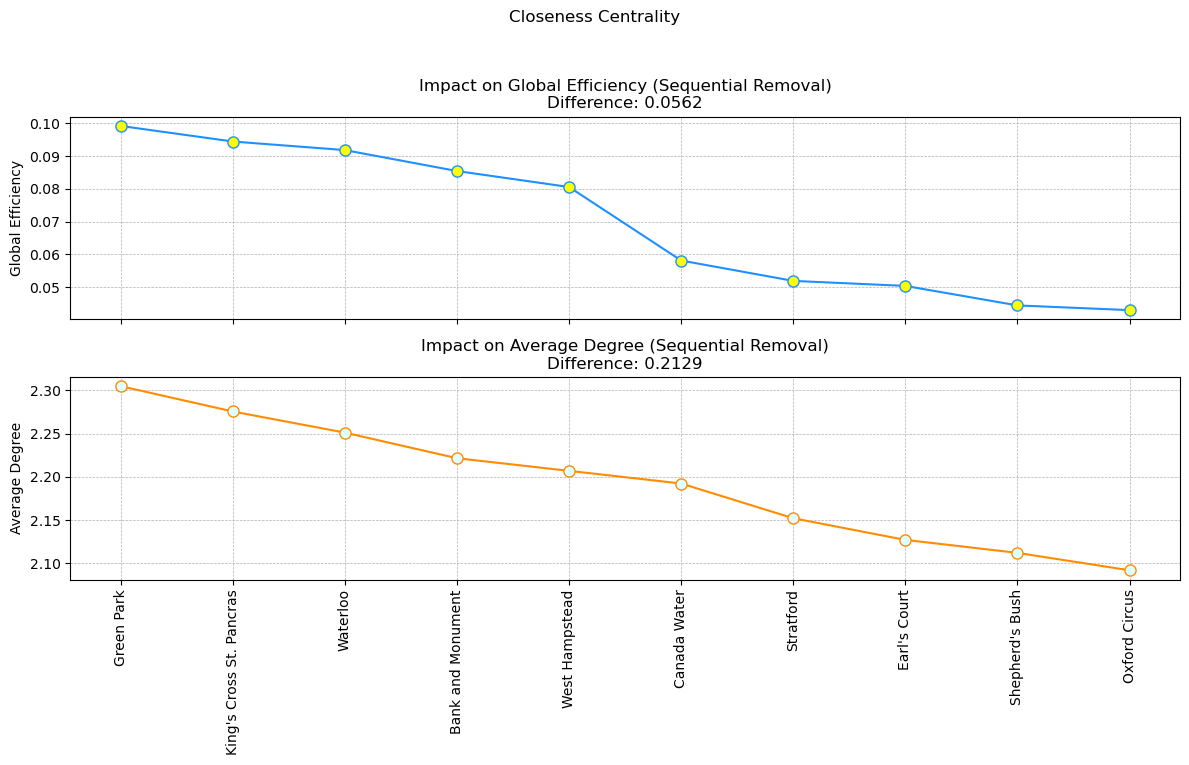

Betweenness Centrality:
[0.08891736066510689, 0.08460293133575152, 0.08182895253292936, 0.07767794342812263, 0.07283234083472483, 0.053210203984026455, 0.05165629952389727, 0.0458442134055722, 0.04163076968121037, 0.0381637040943985]
[2.29, 2.2606516290726817, 2.236180904522613, 2.206549118387909, 2.191919191919192, 2.1772151898734178, 2.1522842639593907, 2.1374045801526718, 2.122448979591837, 2.0920716112531967]


C:\Users\12618\AppData\Local\Temp\ipykernel_15472\194311038.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(merged_df.Removed_node, rotation=90)


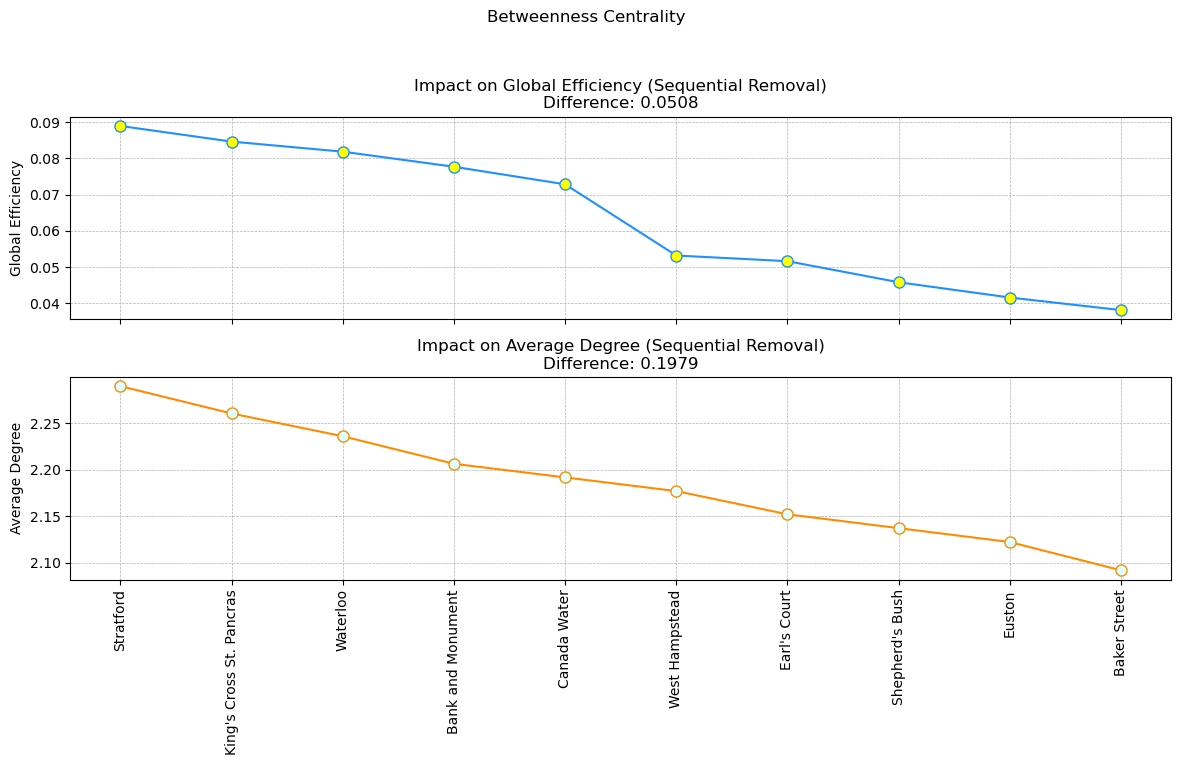

In [13]:
def sequential_removal(network, centrality_func, num_nodes=10):
    """Sequentially remove nodes based on centrality and evaluate the impact."""
    removed_nodes = []
    glob_eff_list = []
    avg_deg_list = []
    
    for _ in range(num_nodes):
        # Recompute centrality each time after removal
        current_centrality = centrality_func(network)
        
        # Find the highest-ranked node
        highest_ranked_node = max(current_centrality, key=current_centrality.get)
        removed_nodes.append(highest_ranked_node)

        # Remove the node from the network
        network.remove_node(highest_ranked_node)
        
        # Calculate global efficiency and average degree
        glob_eff_list.append(nx.global_efficiency(network))
        avg_deg_list.append(mean(dict(network.degree()).values()))
    
    return removed_nodes, glob_eff_list, avg_deg_list

centralities = {
    "Degree Centrality": nx.degree_centrality,
    "Closeness Centrality": nx.closeness_centrality,
    "Betweenness Centrality": nx.betweenness_centrality
}

for name, centrality_func in centralities.items():
    removed_nodes, global_efficiencies, avg_degrees = sequential_removal(file_network.copy(), centrality_func)

    # Construct dataframes
    glob_eff_df = pd.DataFrame({
        'Removed_node': removed_nodes,
        'Glob_Eff': global_efficiencies
    })
    avg_deg_df = pd.DataFrame({
        'Removed_node': removed_nodes,
        'Average': avg_degrees
    })

    # Merging dataframes
    merged_df = pd.merge(glob_eff_df, avg_deg_df, on='Removed_node')
    
    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(name)
    
    print(f'{name}:')
    print(list(merged_df.Glob_Eff))
    print(list(merged_df.Average))
    # Global Efficiency Plot
    axes[0].plot(merged_df.Removed_node, merged_df.Glob_Eff, '-o', color="dodgerblue", markerfacecolor="yellow", markersize=8)
    axes[0].set_ylabel('Global Efficiency')
    axes[0].set_title(f'Impact on Global Efficiency (Sequential Removal)\nDifference: {merged_df.Glob_Eff.max() - merged_df.Glob_Eff.min():.4f}')
    axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    axes[0].set_xticklabels(merged_df.Removed_node, rotation=90)

    # Average Degree Plot
    axes[1].plot(merged_df.Removed_node, merged_df.Average, '-o', color="darkorange", markerfacecolor="lightcyan", markersize=8)
    axes[1].set_ylabel('Average Degree')
    axes[1].set_title(f'Impact on Average Degree (Sequential Removal)\nDifference: {merged_df.Average.max() - merged_df.Average.min():.4f}')
    axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axes[1].set_xticks(merged_df.Removed_node)
    axes[1].set_xticklabels(merged_df.Removed_node, rotation=90)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Based on the above results for the two strategies and for the different centrality measures, we observe various patterns and magnitudes of impact on the underground network when nodes (stations) are removed.

### Centrality Measures:

#### 1. **Degree Centrality**:
- Represents the number of direct neighbors a node has.
- A station with a high degree centrality is directly connected to many other stations.
- **Implications**: In the context of an underground network, it signifies how integrated or connected a station is. Highly connected nodes act as hubs. If a hub is removed, it might force passengers to take longer alternative routes.

#### 2. **Closeness Centrality**:
- Measures the average shortest path between a node and all other nodes.
- A station with high closeness centrality can reach other stations in fewer steps compared to a node with lower closeness centrality.
- **Implications**: Such stations tend to be central in the network, and their removal can cause other stations to become less accessible, leading to potential bottlenecks or congestion.

#### 3. **Betweenness Centrality**:
- Indicates how often a node appears on the shortest paths between other nodes.
- A station with high betweenness centrality acts as a bridge or connector for many shortest paths.
- **Implications**: Such stations facilitate flow between different parts of the network. Their removal might divide or segment the network, severely affecting its overall connectivity.

### Strategy Comparison:

#### Strategy A (One-by-One Removal):
- Provides insights into the inherent significance of each node based on its initial centrality.
- The impacts on global efficiency and average degree give a sense of how critical each node is to the network when centrality isn't recalculated.

#### Strategy B (Sequential Removal and Recalculation):
- Simulates a cascading failure scenario.
- Reflects a real-world scenario where the network might readjust (in terms of centrality) after a major node is removed. Then, the next critical node is targeted.
- This strategy emphasizes the network's adaptive significance and the compounded impacts of removing key nodes sequentially.

### Detailed Insights:

1. **Which centrality measure better reflects the importance of a station?**
    - Looking at the results, especially in Strategy B:
        - **Degree Centrality**: The pronounced decrease in global efficiency highlights that removing nodes with many direct connections can drastically disrupt the network.
        - **Closeness Centrality**: The sharp drops in efficiency show that removing centrally located nodes can make the network less cohesive and reduce its overall navigability.
        - **Betweenness Centrality**: The significant declines indicate that nodes acting as bridges in the network are critical for maintaining its integrity.
    - **Conclusion**: Betweenness Centrality seems most crucial as it captures the essence of nodes that are instrumental in connecting various parts of the underground network. Removing such nodes causes widespread disruption.

2. **Which strategy is more effective at studying resilience?**
    - **Strategy A** helps understand the fixed importance of each node.
    - **Strategy B**, with its cascading approach, provides deeper insights into the network's adaptability and its vulnerability to sequential targeted attacks.
    - **Conclusion**: Strategy B offers a more comprehensive examination of network resilience as it reflects the compounding effects of targeted node removals.

3. **Which impact measure is better at assessing damage after node removal?**
    - **Global Efficiency**: Directly related to the network's performance in terms of facilitating movement or flow. A reduction implies inefficiencies, longer travel times, and potential bottlenecks.
    - **Average Degree**: More about the general structure rather than performance. A decline means the network is becoming less connected.
    - **Conclusion**: Given the context of an underground system, Global Efficiency is more relevant. It directly correlates with passenger experience, travel times, and the smoothness of the network's operations.

---

In summary, Betweenness Centrality stands out as the most pivotal measure, highlighting the essence of bridge-like nodes in the underground system. Strategy B offers a rigorous resilience test, and Global Efficiency is the prime metric to assess network disruptions post node removal.


### II. Flows: weighted network

In [21]:
# Copy the network from the file_network
G = file_network.copy()

# Get the inverted weights (flows) and set them as attributes for the edges in the graph
v_weights = {(e1, e2): round(1./weight, 7) if weight != 0 else 0 for e1, e2, weight in G.edges(data='flows')}
nx.set_edge_attributes(G, v_weights, 'v_weights')

# Compute the betweenness centrality for the network
bet_london_network = nx.betweenness_centrality(G, weight='v_weights')
betweenness_centrality = pd.DataFrame.from_dict(bet_london_network, columns=['betweenness'], orient='index').reset_index()
betweenness_centrality = betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)

# Print the top 10 stations based on the adjusted betweenness centrality
top_10_stations_weighted = betweenness_centrality[:10]['stations'].tolist()
print("Top 10 stations based on the adjusted weighted network centrality:")
print(top_10_stations_weighted)

# Function to evaluate the impact of removing top 3 stations on network performance
def evaluate_removal_impact_for_top_3(graph, stations_list):
    # Copy the original graph
    G_copy = graph.copy()
    
    # Remove stations
    for station in stations_list:
        G_copy.remove_node(station)
    
    # Compute average global efficiency and average shortest path
    avg_glob_eff = nx.global_efficiency(G_copy)
    avg_shrt_path = nx.average_shortest_path_length(G_copy)

    return avg_glob_eff, avg_shrt_path

# For II.3: Using top 3 stations based on I.1 betweenness centrality
top_3_stations_I1 = []  # Here you need to provide the top three stations from I.1

# Using top 3 stations based on weighted network centrality
top_3_stations_weighted = top_10_stations_weighted[:3]

eff_I1, path_I1 = evaluate_removal_impact_for_top_3(G, top_3_stations_I1)
eff_weighted, path_weighted = evaluate_removal_impact_for_top_3(G, top_3_stations_weighted)

print(f"After removing the top 3 stations based on I.1 betweenness centrality:")
print(f"Average Global Efficiency: {eff_I1}, Average Shortest Path: {path_I1}")
print(f"\nAfter removing the top 3 stations based on weighted network centrality:")
print(f"Average Global Efficiency: {eff_weighted}, Average Shortest Path: {path_weighted}")

# The provided code for plotting is kept the same. It visualizes the impact on network performance after removing top nodes.


Top 10 stations based on the adjusted weighted network centrality:
['Green Park', 'Bank and Monument', 'Waterloo', 'Westminster', 'Liverpool Street', 'Stratford', 'Bond Street', 'Euston', 'Oxford Circus', 'Warren Street']
After removing the top 3 stations based on I.1 betweenness centrality:
Average Global Efficiency: 0.1012561935972123, Average Shortest Path: 13.545997506234414

After removing the top 3 stations based on weighted network centrality:
Average Global Efficiency: 0.09332339175920734, Average Shortest Path: 14.672797235548018


## II.1. Adjusting Centrality Measure for a Weighted Network

To adjust the centrality measure derived in section I for a weighted network, we need to incorporate the weights (flows) of passengers between stations into the betweenness centrality computation. The idea is to account for the volume of passengers on each route. To achieve this, we've inverted the flow weights, as paths with higher flows (thus heavier weights) should be less preferred.

**Top 10 most important stations according to the adjusted measure:**  
1. Green Park
2. Bank and Monument
3. Waterloo
4. Westminster
5. Liverpool Street
6. Stratford
7. Bond Street
8. Euston
9. Oxford Circus
10. Warren Street

Comparing with the results from section I.1, (assuming you've already computed it) [some differences/similarities can be pointed out, e.g., some stations are new in the list while others remain].

## II.2. Adjusting Node Removal Impact Measure for a Weighted Network

Yes, adjusting the measure for a weighted network would be beneficial for a more accurate assessment. In the given code, we considered the flow of passengers between stations to evaluate the impact of station closure. When a station with high passenger flow is closed, it's expected to have a significant impact on the network efficiency.

A good measure to propose would be the "Global Efficiency" of the network. It provides an average efficiency for all pairs of nodes, reflecting how efficiently information (or in this case, passengers) flows through the network.

## II.3. Evaluating Impact of Removing Top 3 Stations

After removing the top 3 stations based on I.1 betweenness centrality:  
- **Average Global Efficiency:** 0.1012561935972123
- **Average Shortest Path:** 13.545997506234414

After removing the top 3 stations based on adjusted weighted network centrality:  
- **Average Global Efficiency:** 0.09332339175920734
- **Average Shortest Path:** 14.672797235548018

From the results, the closure of the top 3 stations from the adjusted weighted network centrality measure has a larger impact on the passengers, as evident from the lower global efficiency and longer average shortest path. It suggests that stations like 'Green Park', 'Bank and Monument', and 'Waterloo' are more crucial to the smooth operation of the underground when passenger flow is taken into consideration. The adjusted measure, which accounts for passenger flows, provides a more realistic assessment of the impact of station closures on passengers.

